# Purpose 

- to practice using tools for loading and viewing data sets;
- to visualise data in several ways and check for common pitfalls;
- to plan a simple experiment and prepare the data accordingly;
- to run your experiment and to report and interpret your results clearly and concisely.

In [339]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
assert pd.__version__ >= "1.0"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Step 1: Loading and initial processing of the dataset 

A paper that describes one related version of this dataset is: Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020. Feel free to look at this if you want more information about the dataset.

The data is stored in a CSV (comma separated variable) file and contains the following information 

 - Date: year-month-day
 - Rented Bike Count: Count of bikes rented at each hour
 - Hour: Hour of the day
 - Temperature: Temperature in Celsius
 - Humidity: %
 - Windspeed: m/s
 - Visibility: 10m
 - Dew point temperature: Celsius
 - Solar radiation: MJ/m2
 - Rainfall: mm
 - Snowfall: cm
 - Seasons: Winter, Spring, Summer, Autumn
 - Holiday: Holiday/No holiday
 - Functional Day: NoFunc(Non Functional Hours), Fun(Functional hours)

In [340]:
# Load the data
df = pd.read_csv("SeoulBikeData.csv")

# Display the data
df.head()

# Summarise with pandas function 1
df.info()

# Summarise with pandas function 2
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature (C)            8760 non-null   float64
 4   Humidity (%)               8760 non-null   int64  
 5   Wind speed (m/s)           8759 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature (C)  8759 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8758 non-null   object 
 10  Snowfall (cm)              8760 non-null   object 
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2)
count,8760.000000,8760.000000,8760.000000,8760.000000,8759.000000,8760.000000,8759.000000,8760.000000
mean,704.602055,11.502740,12.914361,58.240183,1.953237,1436.442808,4.074369,0.569111
std,644.997468,6.922779,12.347109,20.584774,21.376612,608.827735,13.061011,0.868746
min,0.000000,0.000000,-17.800000,-26.000000,0.000000,-678.000000,-30.600000,0.000000
25%,191.000000,6.000000,3.500000,42.000000,0.900000,939.500000,-4.700000,0.000000
50%,504.500000,12.000000,13.700000,57.000000,1.500000,1697.500000,5.100000,0.010000
75%,1065.250000,18.000000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000
max,3556.000000,24.000000,306.000000,309.000000,2000.000000,2000.000000,27.200000,3.520000


### 1.2 Initial visualisation

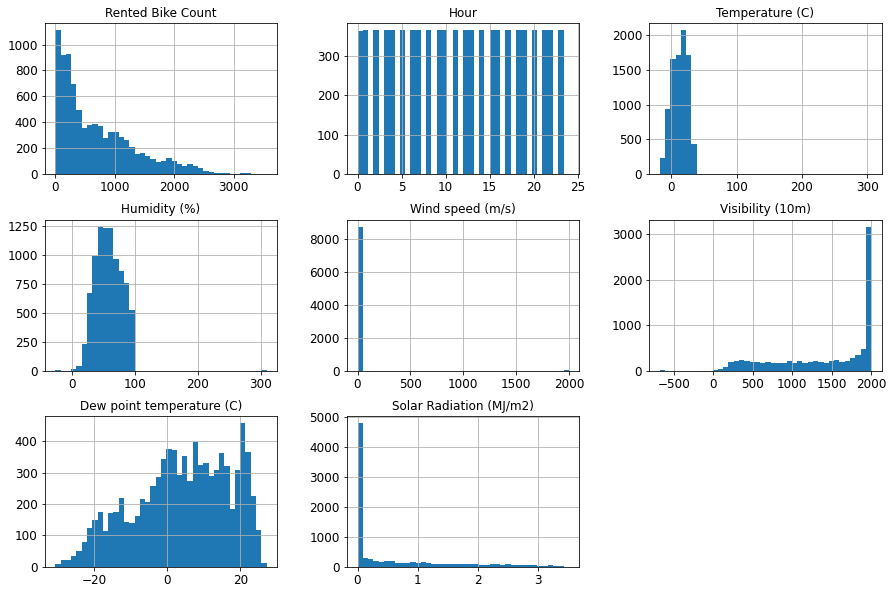

In [341]:
# Created Histograms(Numerical Features only)
histograms = df.hist(bins=40,figsize=(15,10))

### 1.3 Removing unwanted information





In [342]:
# Drop the rows where business is closed and bike rentals were 0.
df.drop(df.loc[df["Functioning Day"] == "No"].index,inplace=True)
df.drop(df.loc[df["Rented Bike Count"] == 0].index,inplace=True)

# Drop the Functioning Day feature.
df.drop(columns=["Functioning Day"],inplace=True)
df.head()


,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,Winter,No Holiday
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,Winter,No Holiday
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,Winter,No Holiday
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,Winter,No Holiday
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,Winter,No Holiday


### 1.4 Numerical encoding


In [343]:
# Used Label Encoder to convert Holiday into 0 and No Holiday to 1.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Holiday"] = encoder.fit_transform(df["Holiday"])
df.head()

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,Winter,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,Winter,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,Winter,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,Winter,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,Winter,1


In [344]:
# Applied get_dummies method on Seasons feature to add 4 new columns and remove the original Seaosns feature.
df = pd.get_dummies(df,columns=["Seasons"])
df.head()

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,1,0,0,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,1,0,0,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,1,0,0,0,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,1,0,0,0,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,1,0,0,0,1


In [345]:
import datetime
def date_is_weekday(datestring):
    ### return 0 if weekend, 1 if weekday
    dsplit = datestring.split('/')
    wday = datetime.datetime(int(dsplit[2]),int(dsplit[1]),int(dsplit[0])).weekday()
    return int(wday<=4)


# Used "apply" method to apply "date_is_weekday" function.
df["Date"] = df.apply(lambda row : date_is_weekday(row["Date"]),axis=1)
df.head()

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,1,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,1,0,0,0,1
1,1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,1,0,0,0,1
2,1,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,1,0,0,0,1
3,1,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,1,0,0,0,1
4,1,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,1,0,0,0,1


**Convert all the remaining data to numerical format**, with any non-numerical entries set to NaN.

In [346]:
# Converting remaining data to numerical format. The row 1393 is having string values "No record" is replaced with NaN.
df = df.apply(pd.to_numeric, errors="coerce")
df.iloc[1393]

Date                            0.0
Rented Bike Count             103.0
Hour                            1.0
Temperature (C)                -7.5
Humidity (%)                   45.0
Wind speed (m/s)                2.4
Visibility (10m)             1853.0
Dew point temperature (C)     -17.4
Solar Radiation (MJ/m2)         0.0
Rainfall(mm)                    NaN
Snowfall (cm)                   NaN
Holiday                         1.0
Seasons_Autumn                  0.0
Seasons_Spring                  0.0
Seasons_Summer                  0.0
Seasons_Winter                  1.0
Name: 1393, dtype: float64

## Step 2: Visualise the data and perform further processing

### 2.1 Visualisation

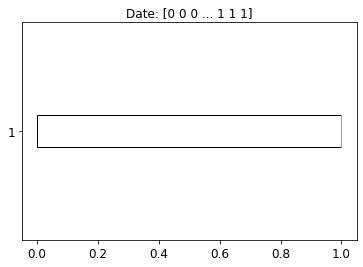

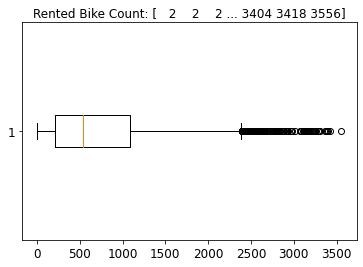

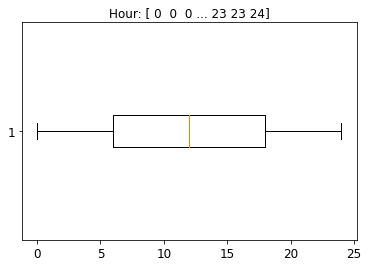

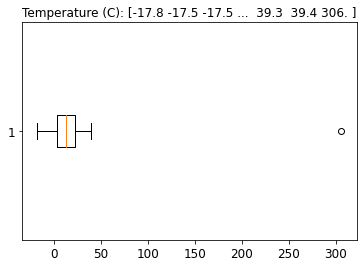

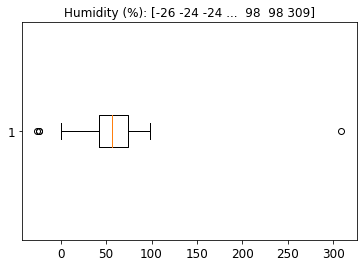

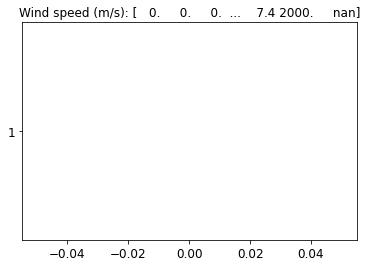

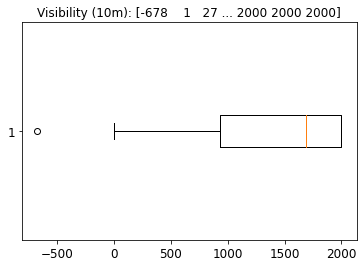

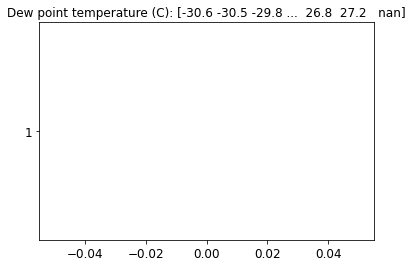

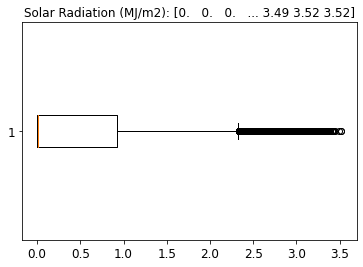

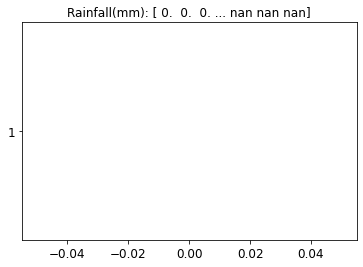

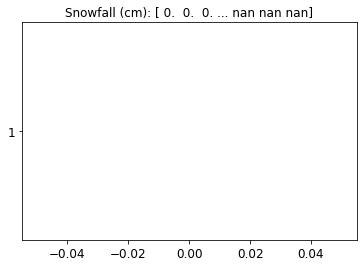

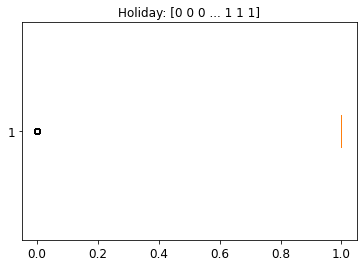

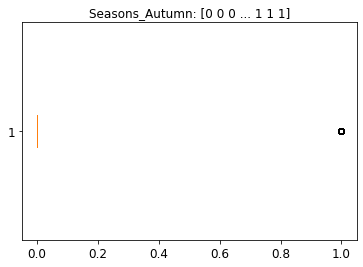

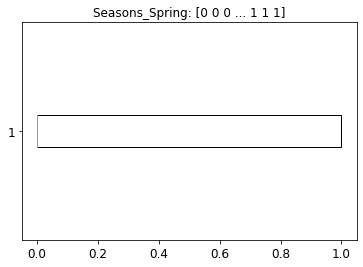

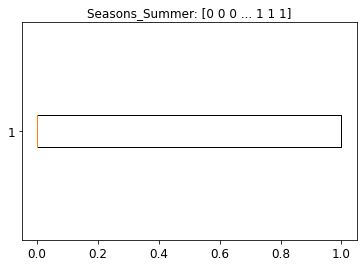

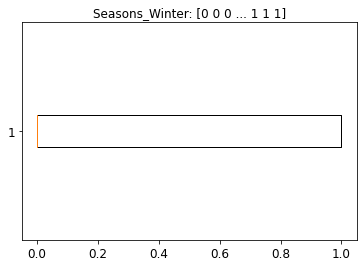

Date: [0 0 0 ... 1 1 1]


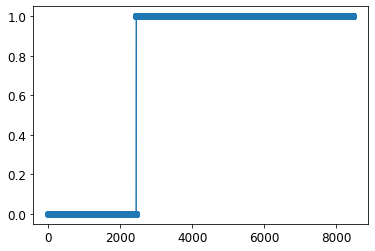

Rented Bike Count: [   2    2    2 ... 3404 3418 3556]


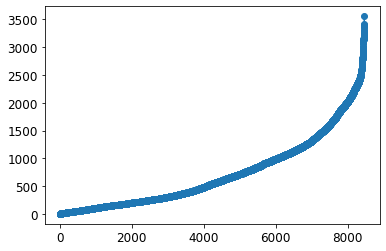

Hour: [ 0  0  0 ... 23 23 24]


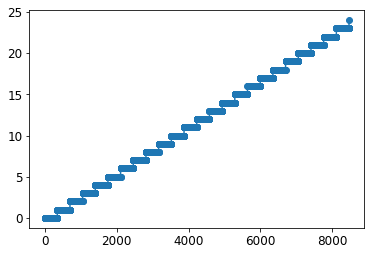

Temperature (C): [-17.8 -17.5 -17.5 ...  39.3  39.4 306. ]


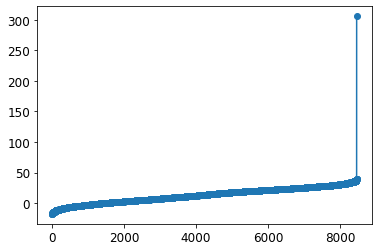

Humidity (%): [-26 -24 -24 ...  98  98 309]


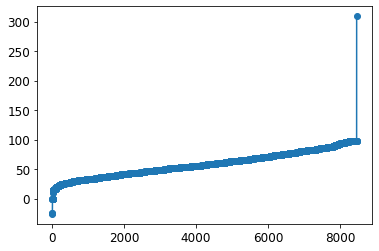

Wind speed (m/s): [   0.     0.     0.  ...    7.4 2000.     nan]


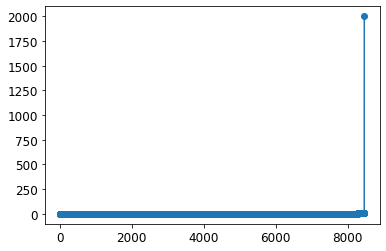

Visibility (10m): [-678    1   27 ... 2000 2000 2000]


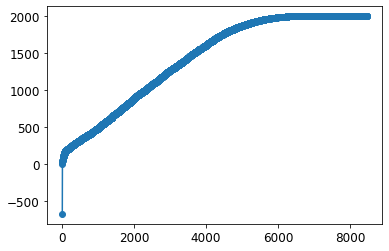

Dew point temperature (C): [-30.6 -30.5 -29.8 ...  26.8  27.2   nan]


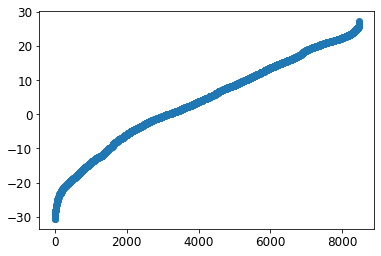

Solar Radiation (MJ/m2): [0.   0.   0.   ... 3.49 3.52 3.52]


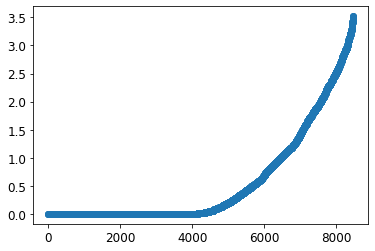

Rainfall(mm): [ 0.  0.  0. ... nan nan nan]


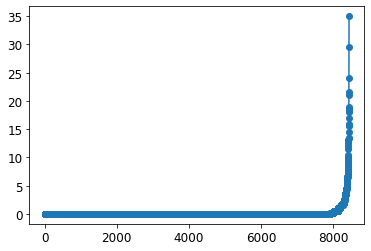

Snowfall (cm): [ 0.  0.  0. ... nan nan nan]


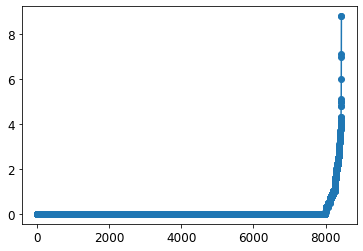

Holiday: [0 0 0 ... 1 1 1]


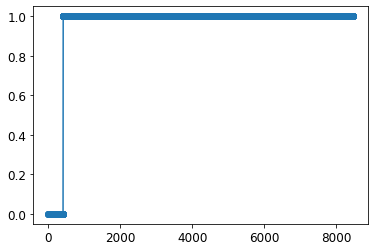

Seasons_Autumn: [0 0 0 ... 1 1 1]


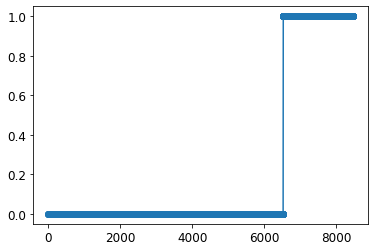

Seasons_Spring: [0 0 0 ... 1 1 1]


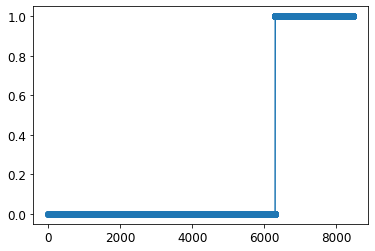

Seasons_Summer: [0 0 0 ... 1 1 1]


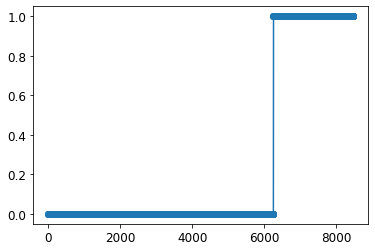

Seasons_Winter: [0 0 0 ... 1 1 1]


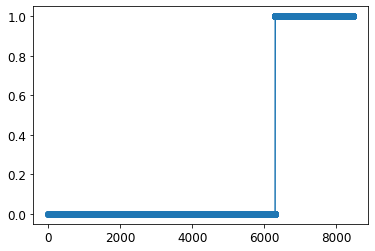

In [347]:
# Observing the data by Box plots. 
for n in range(df.shape[1]):
    plt.boxplot(df.iloc[:,n],vert=False)
    plt.title(f'{df.columns[n]}: {np.sort(df.iloc[:,n])}')
    plt.show()

# Observing the data by Sorted Values. 
for n in range(df.shape[1]):
    print(f'{df.columns[n]}: {np.sort(df.iloc[:,n])}')
    plt.plot(np.sort(df.iloc[:,n]),'-o')
    plt.show()

In [362]:
'''By observing the above graphs, there are certain missing values and outliers in the dataset.
Wind speed (m/s), Dew point temperature (C), Rainfall(mm), and Snowfall (cm) these 4 features are having missing values.'''

'By observing the above graphs, there are certain missing values and outliers in the dataset.\nWind speed (m/s), Dew point temperature (C), Rainfall(mm), and Snowfall (cm) these 4 features are having missing values.'

### 2.2 Imputation and Pre-Processing

In [349]:
# Replacing outliers within few features by np.nan.
df["Temperature (C)"] = np.where(df["Temperature (C)"] > 60,np.nan,df["Temperature (C)"])
df["Humidity (%)"] = np.where(df["Humidity (%)"] > 150,np.nan,df["Humidity (%)"])
df["Wind speed (m/s)"] = np.where(df["Wind speed (m/s)"] > 100,np.nan,df["Wind speed (m/s)"])
df["Visibility (10m)"] = np.where(df["Visibility (10m)"] < -50,np.nan,df["Visibility (10m)"])
df["Rainfall(mm)"] = np.where(df["Rainfall(mm)"] > 20,np.nan,df["Rainfall(mm)"])
df["Snowfall (cm)"] = np.where(df["Snowfall (cm)"] > 60,np.nan,df["Snowfall (cm)"])


# Pipeline

#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler
#from sklearn.impute import SimpleImputer
#from sklearn.linear_model import LinearRegression
#std_pipeline = Pipeline([ ('imputer', SimpleImputer(strategy="median")),('std_scaler', StandardScaler())])

### 2.3 Correlation 

In [350]:
# Creating and Implementing Pipeline.

# Imported libraries for Data Preprocessing and Linear Regression model.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# Standard Pipeline.
std_pipeline = Pipeline([ ('imputer', SimpleImputer(strategy="median")),('std_scaler', StandardScaler())])

# Fit and apply the above pipeline to make temporary version of the whole dataset.
temp_version = std_pipeline.fit_transform(df)

In [351]:
''' Machine learning algorithms are affected by the quality of the data, spread/range of the features. We first have to
  transform the data in such a way that further procedure could take generalised decision making instead of biased 
  decision making.
'''

' Machine learning algorithms are affected by the quality of the data, spread/range of the features. We first have to\n  transform the data in such a way that further procedure could take generalised decision making instead of biased \n  decision making.\n'

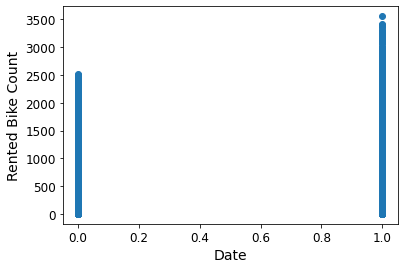

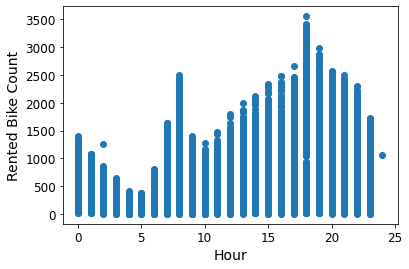

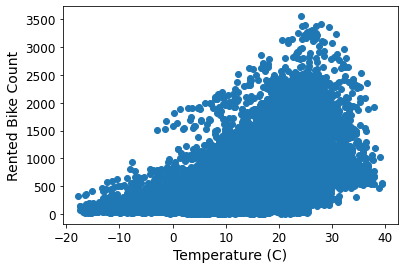

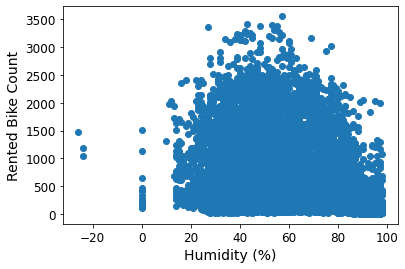

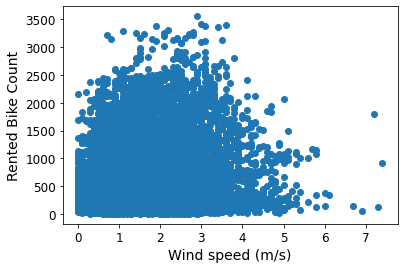

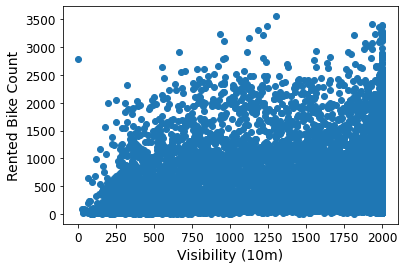

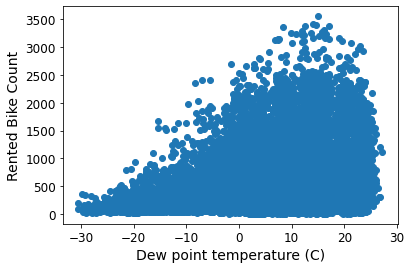

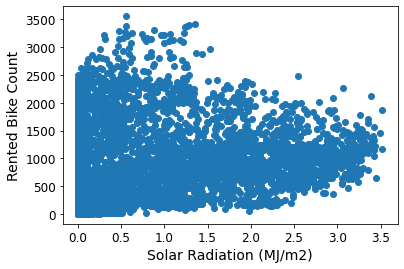

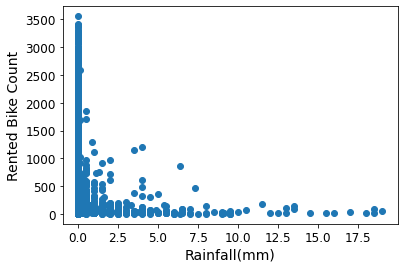

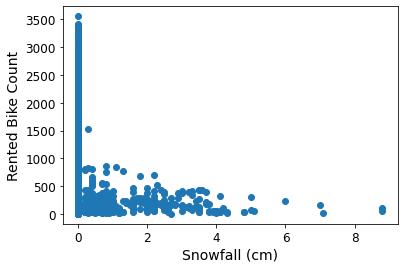

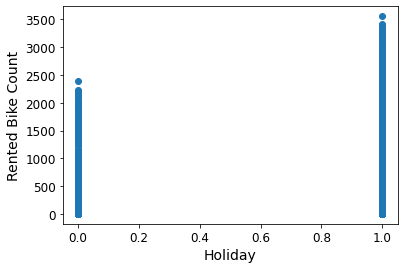

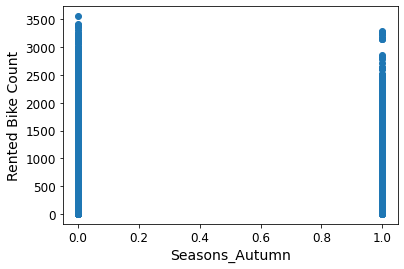

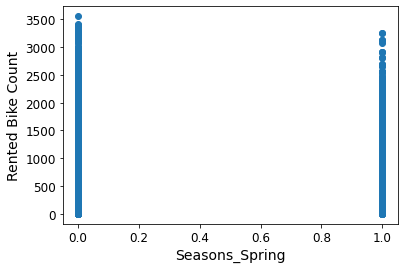

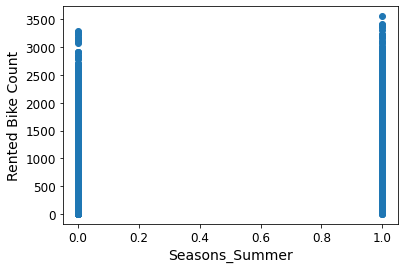

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
Date,1.000000,0.046360,-0.001335,-0.010998,0.015459,0.023766,0.025367,0.003134,-0.014527,0.010523,0.007456,-0.026363,-0.006481,-0.000678,0.007547,-0.000678
Rented Bike Count,0.046360,1.000000,0.425460,0.562774,-0.202275,0.125295,0.210968,0.400248,0.273862,-0.143473,-0.152261,0.070070,0.165333,0.015580,0.282001,-0.458920
Hour,-0.001335,0.425460,1.000000,0.123262,-0.235438,0.287725,0.103010,0.005237,0.144386,0.001744,-0.022149,0.000321,0.001641,-0.000834,0.000086,-0.000834
Temperature (C),-0.010998,0.562774,0.123262,1.000000,0.165774,-0.038451,0.028072,0.914451,0.354732,0.049948,-0.219219,0.057945,0.047385,0.012227,0.677780,-0.740441
Humidity (%),0.015459,-0.202275,-0.235438,0.165774,1.000000,-0.336411,-0.546671,0.538623,-0.457661,0.257303,0.109675,0.047516,0.024221,0.015903,0.198174,-0.238878
Wind speed (m/s),0.023766,0.125295,0.287725,-0.038451,-0.336411,1.000000,0.180266,-0.177251,0.326238,-0.024061,-0.003410,-0.031393,-0.123074,0.074543,-0.067015,0.111541
Visibility (10m),0.025367,0.210968,0.103010,0.028072,-0.546671,0.180266,1.000000,-0.182462,0.153086,-0.191285,-0.122530,-0.022260,0.110368,-0.185279,0.066679,0.011781
Dew point temperature (C),0.003134,0.400248,0.005237,0.914451,0.538623,-0.177251,-0.182462,1.000000,0.098543,0.132161,-0.151262,0.067636,0.049573,0.006446,0.664177,-0.723278
Solar Radiation (MJ/m2),-0.014527,0.273862,0.144386,0.354732,-0.457661,0.326238,0.153086,0.098543,1.000000,-0.080756,-0.073575,0.001963,-0.028287,0.075799,0.132320,-0.181814
Rainfall(mm),0.010523,-0.143473,0.001744,0.049948,0.257303,-0.024061,-0.191285,0.132161,-0.080756,1.000000,0.013361,0.012586,-0.009740,0.023324,0.049150,-0.063652


In [352]:
# Separated dependent and independ features for scatter plots.
features = df.drop(["Rented Bike Count"], axis=1)
target = df["Rented Bike Count"].copy()

# Created a list for Independent Features.
lst = features.columns

# Created Scatter plots for each feature vs target variable.
for i in range(0,len(lst)-1):
    plt.scatter(features[lst[i]],target)
    plt.xlabel(lst[i])
    plt.ylabel("Rented Bike Count")
    plt.show()
    
# Calculated the Correlation among dataset.
df.corr()

In [363]:
'''
Top 3 most correlated features with Target feature.
1) Temperature (c)
2) Seasons_Winter
3) Hour
'''

'\nTop 3 most correlated features with Target feature.\n1) Temperature (c)\n2) Seasons_Winter\n3) Hour\n'

## Step 3: Predicting bike rentals

In [354]:
# Spilt the data with 80% training data and 20% hold-out test data.
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=50)

# Separated the data further for model fitting and prediction. 
X_train = train_set.drop(["Rented Bike Count"], axis=1)
y_train = train_set["Rented Bike Count"].copy()
X_test = test_set.drop(["Rented Bike Count"], axis=1)
y_test = test_set["Rented Bike Count"].copy()

# Pipeline for Linear Regression model.
lr_pipeline = Pipeline([ ('imputer', SimpleImputer(strategy="median")), ('std_scaler', StandardScaler()), ('lr',LinearRegression())])

# Fit the model and Predict the values for traning data.
lr_pipeline.fit(X_train,y_train)
y_pred = lr_pipeline.predict(X_train)

# Evaluate the model based on RMSE value.
from sklearn.metrics import mean_squared_error
rmse_lr = np.sqrt(mean_squared_error(y_pred,y_train))
print(rmse_lr)

423.12524311258505


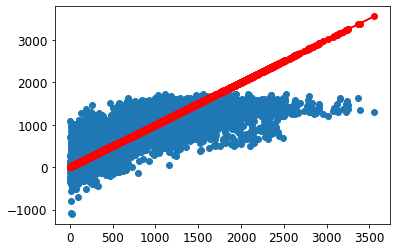

In [355]:
# Visualise and comparing the Linear Regression model predictions with original outcomes.
plt.scatter(y_train,y_pred)
plt.plot(y_train,y_train,'r-o')

836.8242751809039


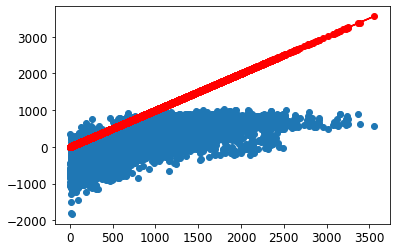

In [356]:
# Imported library for Kernel Ridge Model.
from sklearn.kernel_ridge import KernelRidge

# Pipeline for Linear Kernel Ridge model.
kr_pipeline = Pipeline([ ('imputer', SimpleImputer(strategy="median")), ('std_scaler', StandardScaler()), ('kr',KernelRidge()) ])

# Fit the model and Predict the values for traning data.
kr_pipeline.fit(X_train,y_train)
y_pred = kr_pipeline.predict(X_train)

# Evaluate the model based on RMSE value.
rmse_kr = np.sqrt(mean_squared_error(y_pred,y_train))
print(rmse_kr)

# Visualise and comparing the Kernel Ridge model predictions with original outcomes.
plt.scatter(y_train,y_pred)
plt.plot(y_train,y_train,'r-o')

520.3023940184042


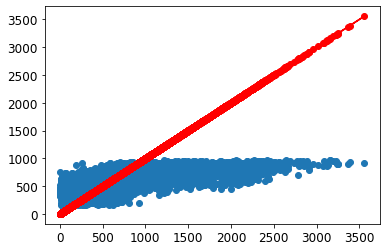

In [357]:
# Imported library for SVR Model.
from sklearn.svm import SVR

# Pipeline for Linear SVR model.
svr_pipeline = Pipeline([ ('imputer', SimpleImputer(strategy="median")), ('std_scaler', StandardScaler()), ('svr',SVR()) ])

# Fit the model and Predict the values for traning data.
svr_pipeline.fit(X_train,y_train)
y_pred = svr_pipeline.predict(X_train)

# Evaluate the model based on RMSE value.
rmse_svr = np.sqrt(mean_squared_error(y_pred,y_train))
print(rmse_svr)

# Visualise and comparing the SVR model predictions with original outcomes.
plt.scatter(y_train,y_pred)
plt.plot(y_train,y_train,'r-o')

## Step 4: Cross validation

In [358]:
# Imported libraries for Cross Validation and Hyperparameter Tuning.
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# Converting Traning data to numpy array.
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

# Linear Regression Cross-Validation
print()
print("_________________________________LinearReg_______________________________")
print()

cv_results = cross_validate(lr_pipeline, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
print(-cv_results['test_score'])
print(np.mean(-cv_results['test_score']))

kf = KFold(n_splits=10)
kf.get_n_splits(X_train)

for train_index, val_index in kf.split(X_train):
    X_trainr, X_val = X_train[train_index], X_train[val_index]
    y_trainr, y_val = y_train[train_index], y_train[val_index]
    lr_pipeline.fit(X_trainr,y_trainr)
    y_pred = lr_pipeline.predict(X_val)
    rmse_knn = np.sqrt(mean_squared_error(y_pred,y_val))
    print(f'VAL RMSE for LinearReg is {rmse_knn}')
    y_pred = lr_pipeline.predict(X_trainr)
    rmse_knn = np.sqrt(mean_squared_error(y_pred,y_trainr))
    print(f'TRAIN RMSE for LinearReg is {rmse_knn}')
    
cv_results = cross_validate(lr_pipeline, X_train, y_train, cv=10, return_train_score=True, scoring='neg_root_mean_squared_error')
print(-cv_results['train_score'])
print(-cv_results['test_score'])
print()
print("Mean of rmse values for validation",np.mean(-cv_results['train_score']))
print("Standard Deviation of rmse values for validation",np.std(-cv_results['train_score']))
print()
print("Mean of rmse values for testing",np.mean(-cv_results['test_score']))
print("Standard Deviation of rmse values for testing",np.std(-cv_results['test_score']))
print()


# Kernel Ridge Cross-Validation
print("_________________________________KernelRidge_______________________________")
print()

cv_results = cross_validate(kr_pipeline, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
print(-cv_results['test_score'])
print(np.mean(-cv_results['test_score']))

kf = KFold(n_splits=10)
kf.get_n_splits(X_train)

for train_index, val_index in kf.split(X_train):
    X_trainr, X_val = X_train[train_index], X_train[val_index]
    y_trainr, y_val = y_train[train_index], y_train[val_index]
    kr_pipeline.fit(X_trainr,y_trainr)
    y_pred = kr_pipeline.predict(X_val)
    rmse_knn = np.sqrt(mean_squared_error(y_pred,y_val))
    print(f'VAL RMSE for KernelRidge is {rmse_knn}')
    y_pred = kr_pipeline.predict(X_trainr)
    rmse_knn = np.sqrt(mean_squared_error(y_pred,y_trainr))
    print(f'TRAIN RMSE for KernelRidge is {rmse_knn}')
    
cv_results = cross_validate(kr_pipeline, X_train, y_train, cv=10, return_train_score=True, scoring='neg_root_mean_squared_error')
print(-cv_results['train_score'])
print(-cv_results['test_score'])
print(np.mean(-cv_results['test_score']))
print()
print("Mean of rmse values for validation",np.mean(-cv_results['train_score']))
print("Standard Deviation of rmse values for validation",np.std(-cv_results['train_score']))
print()
print("Mean of rmse values for testing",np.mean(-cv_results['test_score']))
print("Standard Deviation of rmse values for testing",np.std(-cv_results['test_score']))
print()



# SVR Cross-Validation
print("_________________________________SVR_______________________________")
print()

cv_results = cross_validate(svr_pipeline, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
print(-cv_results['test_score'])
print(np.mean(-cv_results['test_score']))

kf = KFold(n_splits=10)
kf.get_n_splits(X_train)

for train_index, val_index in kf.split(X_train):
    X_trainr, X_val = X_train[train_index], X_train[val_index]
    y_trainr, y_val = y_train[train_index], y_train[val_index]
    svr_pipeline.fit(X_trainr,y_trainr)
    y_pred = svr_pipeline.predict(X_val)
    rmse_knn = np.sqrt(mean_squared_error(y_pred,y_val))
    print(f'VAL RMSE for SVR is {rmse_knn}')
    y_pred = svr_pipeline.predict(X_trainr)
    rmse_knn = np.sqrt(mean_squared_error(y_pred,y_trainr))
    print(f'TRAIN RMSE for SVR is {rmse_knn}')
    
cv_results = cross_validate(svr_pipeline, X_train, y_train, cv=10, return_train_score=True, scoring='neg_root_mean_squared_error')
print(-cv_results['train_score'])
print(-cv_results['test_score'])
print(np.mean(-cv_results['test_score']))
print()
print("Mean of rmse values for validation",np.mean(-cv_results['train_score']))
print("Standard Deviation of rmse values for validation",np.std(-cv_results['train_score']))
print()
print("Mean of rmse values for testing",np.mean(-cv_results['test_score']))
print("Standard Deviation of rmse values for testing",np.std(-cv_results['test_score']))



_________________________________LinearReg_______________________________

[442.79801165 431.7215035  428.70590406 422.60300428 429.01589803
 433.9564609  402.14315985 428.0159774  421.05442269 402.89908019]
424.291342255548
VAL RMSE for LinearReg is 442.79801165263626
TRAIN RMSE for LinearReg is 421.00464316418703
VAL RMSE for LinearReg is 431.72150350205436
TRAIN RMSE for LinearReg is 422.2273970372598
VAL RMSE for LinearReg is 428.7059040601354
TRAIN RMSE for LinearReg is 422.53364082848424
VAL RMSE for LinearReg is 422.6030042804421
TRAIN RMSE for LinearReg is 423.22975841411187
VAL RMSE for LinearReg is 429.0158980312397
TRAIN RMSE for LinearReg is 422.52380094643144
VAL RMSE for LinearReg is 433.95646090185016
TRAIN RMSE for LinearReg is 421.97508401272927
VAL RMSE for LinearReg is 402.1431598501764
TRAIN RMSE for LinearReg is 425.4346628396122
VAL RMSE for LinearReg is 428.01597739695035
TRAIN RMSE for LinearReg is 422.615037051248
VAL RMSE for LinearReg is 421.0544226905126
TR

In [359]:
''' Both Linear Reg. and SVR are giving good training and validation score. KernelRidge is not suitable for this dataset.
In my perception, Linear Regression model is the optimal one for this dataset. KernelRidge model is having uder-fitting.
'''

' Both Linear Reg. and SVR are giving good training and validation score. KernelRidge is not suitable for this dataset.\nIn my perception, Linear Regression model is the optimal one for this dataset. KernelRidge model is having uder-fitting.\n'

## Step 5: Grid parameter search 

In [360]:
# Defined a parameter grid for hyperparameter C.
parameters = {'svr__C':[0.1,1,10,50,100,500,1000]}
gridcv = GridSearchCV(svr_pipeline, parameters, cv=10, scoring='neg_root_mean_squared_error')
gridcv.fit(X_train, y_train)
print(f'Best score is {-gridcv.best_score_} for best params of {gridcv.best_params_}') 

# Applied the best configration/setting of hyperparameter and feed the SVR model. Evaluated a tuned SVR model with RMSE score.
gridcv.best_estimator_.fit(np.concatenate((X_train,X_val)),np.concatenate((y_train,y_val)))
y_test_pred = gridcv.best_estimator_.predict(X_test)
print(f'Test RMSE is {np.sqrt(mean_squared_error(y_test_pred,y_test))}')

Best score is 290.3892427186069 for best params of {'svr__C': 1000}
Test RMSE is 317.8881642909967


In [361]:
'''
Since I have tuned SVR model therefore, this answer is based on SVR model. By observing the both performance, model is surely
doing better with the testset. Model is generalised, neither over-fitted or under-fitted.
'''

'\nSince I have tuned SVR model therefore, this answer is based on SVR model. By observing the both performance, model is surely\ndoing better with the testset. Model is generalised, neither over-fitted or under-fitted.\n'